In [1]:
# 1.0 Call libraries
# 1.1 Data manipulation library
import pandas as pd
import numpy as np
# 1.2 OS related package
import os
# 1.3 Modeling librray
# 1.3.1 Scale data
from sklearn.preprocessing import StandardScaler
# 1.3.2 Split dataset
from sklearn.model_selection import train_test_split
# 1.3.3 Class to develop kmeans model
from sklearn.cluster import KMeans
# 1.4 Plotting library
import seaborn as sns
import plotly.express as px
# 1.5 How good is clustering?
from sklearn.metrics import silhouette_score

In [2]:
# 1.6 Set numpy options to display wide array
np.set_printoptions(precision = 3,          # Display upto 3 decimal places
                    threshold=np.inf        # Display full array
                    )

In [3]:
# 2.1 Read csv file -
df_fundamentals = pd.read_csv("../input/nyse/fundamentals.csv")

In [4]:
# 2.2 Explore dataset
df_fundamentals.shape # 1781 Rows , 79 Columns
df_fundamentals.head() # First Five Rows

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
#2.3 Drop Unnamed Column 
df_fundamentals.drop(df_fundamentals.columns[df_fundamentals.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [6]:
#2.4 Get Columns
df_fundamentals.columns.values

array(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', "Add'l income/expense items",
       'After Tax ROE', 'Capital Expenditures', 'Capital Surplus',
       'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory',
       'Investments', 'Liabilities', 'Long-Term Debt',
       'Long-Term Investments', 'Minority Interest', 'Misc. Stocks',
       'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating',
       'Net Cash Flows-Financing', 'Net Cash Flows-Investing',
       'Net Income', 'Net Income Ad

In [7]:
#2.5Rename columns by replacing spaces in column_names with underscore and also remove other symbols
#from column names such as: , (comma), . (full-stop), / (backslash) etc.
#That is clean the column names and assign these new names to your dataset.

In [8]:
#2.6 Columns stored in a List.
list1 = df_fundamentals.columns

In [9]:
#2.7 Prepare a List contains column name space replaced with Underscore(_)
list2= [
'Ticker_Symbol', 'Period_Ending', 'Accounts_Payable',
       'Accounts_Receivable', 'Addl_income_expense_items', 'After_Tax_ROE',
       'Capital_Expenditures', 'Capital_Surplus', 'Cash_Ratio',
       'Cash_and_Cash_Equivalents', 'Changes_in_Inventories', 'Common_Stocks',
       'Cost_of_Revenue', 'Current_Ratio', 'Deferred_Asset_Charges',
       'Deferred_Liability_Charges', 'Depreciation',
       'Earnings_Before_Interest_and_Tax', 'Earnings_Before_Tax',
       'Effect_of_Exchange_Rate',
       'Equity_Earnings_Loss_Unconsolidated_Subsidiary', 'Fixed_Assets',
       'Goodwill', 'Gross_Margin', 'Gross_Profit', 'Income_Tax',
       'Intangible_Assets', 'Interest_Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long_Term_Debt', 'Long_Term_Investments',
       'Minority_Interest', 'Misc_Stocks', 'Net_Borrowings', 'Net_Cash_Flow',
       'Net_Cash_Flow_Operating', 'Net_Cash_Flows_Financing',
       'Net_Cash_Flows_Investing', 'Net_Income', 'Net_Income_Adjustments',
       'Net_Income_Applicable_to_Common_Shareholders',
       'Net_Income_Cont_Operations', 'Net_Receivables', 'Non_Recurring_Items',
       'Operating_Income', 'Operating_Margin', 'Other_Assets',
       'Other_Current_Assets', 'Other_Current_Liabilities', 'Other_Equity',
       'Other_Financing_Activities', 'Other_Investing_Activities',
       'Other_Liabilities', 'Other_Operating_Activities',
       'Other_Operating_Items', 'Pre_Tax_Margin', 'Pre_Tax_ROE',
       'Profit_Margin', 'Quick_Ratio', 'Research_and_Development',
       'Retained_Earnings', 'Sale_and_Purchase_of_Stock',
       'Sales, General_and_Admin',
       'Short_Term_Debt_Current_Portion_of_Long_Term_Debt',
       'Short_Term_Investments', 'Total_Assets', 'Total_Current_Assets',
       'Total_Current_Liabilities', 'Total_Equity', 'Total_Liabilities',
       'Total_Liabilities_Equity', 'Total_Revenue', 'Treasury_Stock',
       'For_Year', 'Earnings_Per_Share', 'Estimated_Shares_Outstanding']

In [10]:
#2.8 Create a dictionary which contains old & new columns list
dict1= dict(zip(list1,list2)) 

In [11]:
#2.9 Function 'ChngColName' will replace the special characets from column name
def chngColName(d,x):
   x.rename(d,axis=1,inplace=True)
   return x  
chngColName(dict1,df_fundamentals)

,Ticker_Symbol,Period_Ending,Accounts_Payable,Accounts_Receivable,Addl_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,1.154000e+09,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [12]:
#3.0  Drop Rows having NaN/NULL values
df_fundamentals.dropna()

,Ticker_Symbol,Period_Ending,Accounts_Payable,Accounts_Receivable,Addl_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,ZBH,2014-12-31,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,...,4.313300e+09,1.024000e+09,6.549900e+09,3.108100e+09,9.658000e+09,4.673300e+09,-6.183700e+09,2014.0,4.26,1.690845e+08
1772,ZBH,2015-12-31,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,...,5.862900e+09,1.617900e+09,9.887900e+09,1.733160e+10,2.721950e+10,5.997800e+09,-6.329100e+09,2015.0,0.78,1.884615e+08
1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.000000e+00,2013.0,1.01,4.990099e+08
1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.000000e+00,2014.0,1.16,5.025862e+08


In [13]:
#3.1  Drop Columns having NaN/NULL Value
df_fundamentals.dropna(axis=1,inplace=True)

In [14]:
#3.2 After Dropping Null Rows & Columns Explore the Dataset.
df_fundamentals.shape #1781 Rows, 72 Columns

(1781, 72)

In [15]:
#3.3 Create 2 new columns 'Long_Term_Liabilities' & 'Fixed_Assets'
df_fundamentals['Long_Term_Liabilties']=df_fundamentals['Total_Liabilities']-df_fundamentals['Total_Current_Liabilities']
df_fundamentals['Fixed_Assets']=df_fundamentals['Total_Assets']-df_fundamentals['Total_Current_Assets']

In [16]:
#3.4 Describe Dataframe
df_fundamentals1= df_fundamentals.describe()
df_fundamentals1

,Accounts_Payable,Accounts_Receivable,Addl_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,...,Short_Term_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_Equity,Total_Revenue,Treasury_Stock,Long_Term_Liabilties
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,8.521399e+09,-6.787749e+07,1.608543e+09,1.235213e+10,...,1.123632e+09,5.570921e+10,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,3.910428e+10
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,5.432105e+10,3.903369e+08,9.177636e+09,3.041419e+10,...,5.703582e+09,2.033590e+11,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,1.815254e+11
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,2.100000e+04,-5.562000e+09,0.000000e+00,0.000000e+00,...,0.000000e+00,2.705000e+06,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,0.000000e+00
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,3.088000e+08,-5.400000e+07,1.628000e+06,1.194400e+09,...,0.000000e+00,6.552689e+09,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2.128000e+09
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,8.625900e+08,0.000000e+00,7.725000e+06,3.685000e+09,...,0.000000e+00,1.517000e+10,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,6.197700e+09
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,2.310000e+09,0.000000e+00,2.970000e+08,9.800600e+09,...,2.549710e+08,3.599710e+10,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,1.744660e+10
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,7.281110e+11,3.755000e+09,1.581420e+11,3.650860e+11,...,1.067300e+11,2.572274e+12,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2.340547e+12


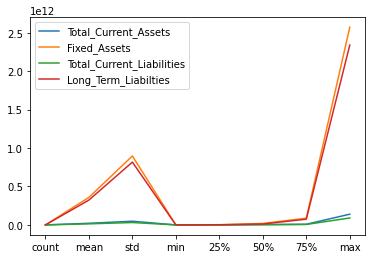

In [17]:
#3.5 Draw a Line graph for 'Total_Current_Assets','Fixed_Assets','Total_Current_Liabilities','Long_Term_Liabilties' columns
df_fundamentals1[['Total_Current_Assets','Fixed_Assets','Total_Current_Liabilities','Long_Term_Liabilties']].describe().plot(kind='line')

In [18]:
# It shows Fixed Assets & Long Term Liabilities are more than short term liabilities and current assets. 
# Current Assets include cash, receivables(in short time) whereas fixed assets include plants,machinary, building, land.
# Long term liabilities include Term Loan, Caital whereas current liabilities means short term loans.

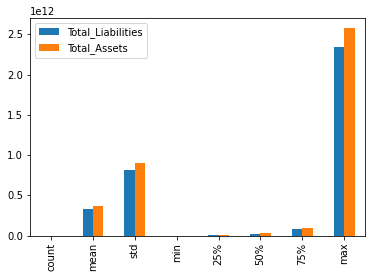

In [19]:
# 3.5 Bar Chart to relate 'Total Liabilities' & 'Total Assets'
df_fundamentals1[['Total_Liabilities','Total_Assets']].describe().plot(kind='bar')

In [20]:
#3.6 Group data by Ticker Symbols and take a mean of all numeric variables.
df_fundamentals2=df_fundamentals.groupby(['Ticker_Symbol']).mean()
df_fundamentals2

,Accounts_Payable,Accounts_Receivable,Addl_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,...,Short_Term_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_Equity,Total_Revenue,Treasury_Stock,Long_Term_Liabilties
Ticker_Symbol,,,,,,,,,,,,,,,,,,,,,
AAL,4.453250e+09,-3.075000e+07,-1.385500e+09,92.00,-4.116000e+09,1.050325e+10,1.589500e+09,0.000000e+00,3.625000e+07,1.205850e+10,...,5.924000e+09,3.935700e+10,1.078250e+10,1.245650e+10,-7.655000e+08,3.847100e+10,3.770550e+10,3.380950e+10,-9.175000e+07,2.601450e+10
AAP,3.097954e+09,-4.789875e+07,-2.735000e+05,25.50,-2.325330e+08,5.544462e+08,4.765088e+08,-2.338910e+08,7.000000e+03,4.263282e+09,...,0.000000e+00,6.568878e+09,4.213842e+09,3.194079e+09,1.797615e+09,4.771263e+09,6.568878e+09,8.069924e+09,-9.193450e+07,1.577184e+09
AAPL,5.121600e+10,-2.620250e+09,1.192250e+09,36.50,-1.042925e+10,0.000000e+00,1.742675e+10,-2.675000e+08,2.543600e+10,1.225822e+11,...,2.616800e+10,2.627175e+11,8.451600e+10,6.668050e+10,1.206750e+11,1.420425e+11,2.627175e+11,2.007648e+11,0.000000e+00,7.536200e+10
ABBV,6.899750e+09,-8.600000e+07,-2.297500e+08,457.75,-4.920000e+08,5.236250e+09,8.060750e+09,-2.240000e+08,1.225000e+07,4.503750e+09,...,6.022500e+08,3.419225e+10,1.639925e+10,8.985500e+09,2.457250e+09,3.173500e+10,3.419225e+10,1.999725e+10,-2.532750e+09,2.274950e+10
ABC,1.959230e+10,-1.410580e+09,-1.695250e+07,30.50,-2.907770e+08,3.294914e+09,1.987198e+09,-1.319396e+09,2.729250e+06,1.192619e+11,...,0.000000e+00,2.551750e+10,1.859505e+10,1.974508e+10,1.755608e+09,2.376189e+10,2.551750e+10,1.225849e+11,-3.094310e+09,4.016810e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,1.840122e+09,1.279100e+07,3.793449e+09,17.75,-4.539150e+08,8.889600e+09,2.260344e+09,0.000000e+00,1.026500e+06,1.608767e+09,...,3.099751e+09,3.520488e+10,6.907578e+09,2.105727e+09,2.385512e+10,1.134976e+10,3.520488e+10,4.813345e+09,-7.980648e+08,9.244031e+09
YUM,2.192500e+09,-2.625000e+07,0.000000e+00,83.50,-1.038500e+09,0.000000e+00,7.735000e+08,1.575000e+07,0.000000e+00,9.598500e+09,...,0.000000e+00,8.529250e+09,1.714250e+09,2.510250e+09,1.694500e+09,6.834750e+09,8.529250e+09,1.327525e+10,0.000000e+00,4.324500e+09
ZBH,3.079750e+08,-5.407500e+07,-9.275000e+06,9.25,-3.332250e+08,5.006800e+09,1.126875e+09,-1.464000e+08,2.725000e+06,1.358825e+09,...,5.439250e+08,1.386762e+10,4.520650e+09,1.134875e+09,7.149000e+09,6.718625e+09,1.386762e+10,4.941550e+09,-5.842650e+09,5.583750e+09


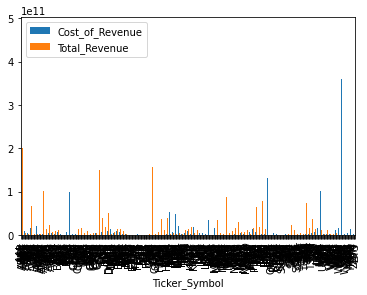

In [21]:
#3.7 A line chart to relate 'Cost_of_Revenue','Total_Revenue'
df_fundamentals2[['Cost_of_Revenue','Total_Revenue']].plot(kind='bar')

In [22]:
# 3.8 Read csv file
df_prices = pd.read_csv("../input/nyse/prices.csv")

In [23]:
#3.9 Explore Data
df_prices.shape    #851264 Rows, 7 Columns
df_prices.columns.values

array(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'],
      dtype=object)

In [24]:
#4.0 Describe 
df_prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [25]:
# 4.1 Copy 'close' column to another variable 'y'.
# Copy 'open','low', 'high', 'volume' to another variable 'x'
#     We will not use 'close' column in clustering
# Similarly 'date' column will also not be used

x=df_prices[['open','low', 'high', 'volume']].values
y=df_prices['close'].values

In [26]:
# 4.2 Scale data using StandardScaler
ss = StandardScaler()     # Create an instance of class
ss.fit(x)                # Train object on the data
z = ss.transform(x)      # Transform data
z[:5, :]                  # See first 5 rows

array([[ 0.628,  0.63 ,  0.648, -0.26 ],
       [ 0.65 ,  0.601,  0.639, -0.242],
       [ 0.544,  0.541,  0.571, -0.234],
       [ 0.533,  0.523,  0.543, -0.273],
       [ 0.552,  0.531,  0.542, -0.321]])

In [27]:
# 4.3 Split dataset into train/test
z_train, z_test, _, y_test = train_test_split( z,               # np array without target
                                               y,               # Target
                                               test_size = 0.25 # test_size proportion
                                               )

In [28]:
# 4.4 Examine the results
z_train.shape    #(638448, 4)          
z_test.shape     #(212816, 4)    

(212816, 4)

In [29]:
# 4.5 Develop model
# 4.6 Create an instance of modeling class
#     We will have two clusters
clf = KMeans(n_clusters = 2)
# 4.7 Train the object over data
clf.fit(z_train)

KMeans(n_clusters=2)

In [30]:
# 4.8 So what are our clusters?
clf.cluster_centers_
clf.cluster_centers_.shape     # (2,4)
clf.labels_                    # Cluster labels for every observation
clf.labels_.size               # 638448
clf.inertia_                   # Sum of squared distance to respective centriods, SSE


1398653.8789030288

In [31]:
# 4.9 Make prediction over our test data and check accuracy
y_pred = clf.predict(z_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# 5.0 How good is prediction
np.sum(y_pred == y_test)/y_test.size

0.0

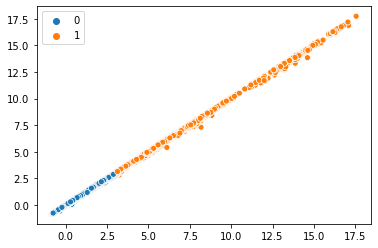

In [33]:

# 5.1 Are clusters distiguisable?
#     We plot 1st and 2nd columns of X
#     Each point is coloured as per the
#     cluster to which it is assigned (y_pred)
dx = pd.Series(z_test[:, 0])
dy = pd.Series(z_test[:,1])
sns.scatterplot(dx,dy, hue = y_pred)

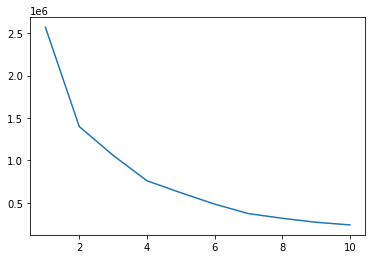

In [34]:
# 5.2 Scree plot:
sse = []
for i,j in enumerate(range(10)):
    # 5.2.1 How many clusters?
    n_clusters = i+1
    # 5.2.2 Create an instance of class
    clf = KMeans(n_clusters = n_clusters)
    # 5.2.3 Train the kmeans object over data
    clf.fit(z_train)
    # 5.2.4 Store the value of inertia in sse
    sse.append(clf.inertia_ )

# 5.3 Plot the line now
sns.lineplot(range(1, 11), sse)
